In [2]:
import numpy as np
from matplotlib.pyplot import imread, figure
import matplotlib.pyplot as plt
from scipy import ndimage, misc


In [3]:
%system date

['Fr 26. Jun 08:39:10 CEST 2020']

In [55]:
!pwd

/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework


In [54]:
#Task: Upload an image of yourself here and apply three filters over it (e.g. Edge Detection Filter)

In [53]:
#!conda list
#!pip install opencv-python

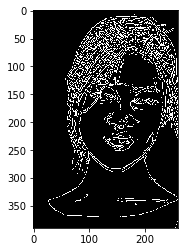

In [56]:
# 1.Canny edge detection filter
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys


# read the image
#image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Sydney-Opera-House.jpg")
#image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/DSC_0027.JPG")
#image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Won_Mi-Kyung.jpeg")
#image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/hg")
image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Han_Ye_Ri.jpg")

# convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the grayscale image, if you want to show, uncomment 2 below lines
# plt.imshow(gray, cmap="gray")
# plt.show()

# perform the canny edge detector to detect image edges
edges = cv2.Canny(gray, threshold1=30, threshold2=100)

# show the detected edges
plt.imshow(edges, cmap="gray")
plt.show()

259
390


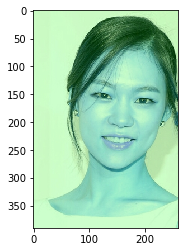

In [57]:
#2. Simple color filter
#creating a color filter - an image with just a single color
import numpy as np
import cv2
from matplotlib import pyplot as plt


#red_img  = np.full((390,259,3), (0,0,255), np.uint8)
green_img  = np.full((390,259,3), (0,255,0), np.uint8)
#blue_img  = np.full((390,259,3), (255,0,0), np.uint8)

target_img = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Han_Ye_Ri.jpg")


height = target_img.shape[0]
width = target_img.shape[1]


print(width)
print(height)


fused_img  = cv2.addWeighted(target_img, 0.8, green_img, 0.2, 0)

#Show the image with matplotlib
plt.imshow(fused_img)
plt.show()


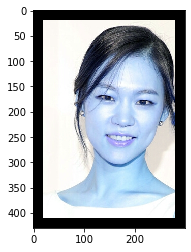

In [58]:
# 3.Simple color border filter
import cv2
import numpy as np
from matplotlib import pyplot as plt


# read the target file
target_img = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Han_Ye_Ri.jpg")

# create a border of a specfic color (here: black) and apply to image
BLACK = [0,0,0]
black_border_img = cv2.copyMakeBorder(target_img, 20,20,20,20, cv2.BORDER_CONSTANT, value=BLACK)

#Show the image with matplotlib
plt.imshow(black_border_img)
plt.show()

In [59]:
# 4. Gaussian Blur filter
# * Python script to demonstrate Gaussian blur.

import skimage
from skimage.viewer import ImageViewer


#  set the kernel size
sigma = float(3)

# read and display original image
image = skimage.io.imread(fname= "/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Han_Ye_Ri.jpg")
viewer = ImageViewer(image)
viewer.show()

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    image, sigma=(sigma, sigma), truncate=3.5, multichannel=True)

# display blurred image
viewer = ImageViewer(blurred)
viewer.show()

[]

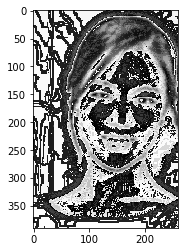

In [63]:
# 5. 
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys
import skimage
from skimage.viewer import ImageViewer


# read the image
image = cv2.imread("/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework/data/Han_Ye_Ri.jpg")

# convert it to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blurring/smoothing
#Gaussian filter from scipy.ndimage:

blurred_face = ndimage.gaussian_filter(gray, sigma=3)
very_blurred = ndimage.gaussian_filter(gray, sigma=5)
 
#Uniform filter
local_mean = ndimage.uniform_filter(gray, size=11)

# display images
#plt.imshow(blurred_face, cmap=plt.cm.gray)
#plt.imshow(very_blurred, cmap=plt.cm.gray)
#plt.imshow(local_mean, cmap=plt.cm.gray)

# Sharpening
#Sharpen a blurred image:

blurred_f = ndimage.gaussian_filter(gray, 3)

#increase the weight of edges by adding an approximation of the Laplacian:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 35
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

# display images
#plt.imshow(filter_blurred_f, cmap=plt.cm.gray)
plt.imshow(sharpened, cmap=plt.cm.gray)


# Denoising
gray_part = gray[100:250,50:200]
noisy = gray_part+ 0.4 * gray_part.std() * np.random.random(gray_part.shape)

#A Gaussian filter smoothes the noise out… and the edges as well:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

#A median filter preserves better the edges:
med_denoised = ndimage.median_filter(noisy, 3)

# display images
#plt.imshow(noisy, cmap=plt.cm.gray)
#plt.imshow(gauss_denoised, cmap=plt.cm.gray)
#plt.imshow(med_denoised, cmap=plt.cm.gray)
